In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import sys

sys.path.append("../src/")
from Intensity_PDF import *
from Tissue_Fluorophore import Tissue_Fluorophore
from irf_function import IRF
from spectral_sensitivity import SpectralSensitivity
from random_emission_generator import Emission_Generator
from bias import Bias
import numpy as np
from typing import Tuple
from visualisation_utils import (
    save_data,
    save_peak_intensities,
    save_bias_data,
    plot_peak_intensity_per_channel,
    data_and_irf_inspection,
    single_data_and_irf_inspection,
    get_max_and_average_peak_intensity_per_channel,
    get_peak_intensity_per_channel,
)
from scipy import signal
from scipy import interpolate as interp
import seaborn as sns
from path_vars import IRF_PATH, PDE_PATH
import datetime as dt

In [3]:
irf = IRF(path=IRF_PATH)
pde = SpectralSensitivity(path=PDE_PATH)
eg = Emission_Generator()

photon_count = np.random.randint(1_000_000, 10_000_000)
lifetime = np.random.uniform(0.1, 5)
time = dt.datetime.now().strftime("%Y-%m-%d|%H:%M:%S")

print(f"Emission Bounds: {eg.emission_bounds}")
print(f"photon count: {photon_count:_}")
print(f"lifetime: {lifetime}")
print(f"time: {time}")


fluo = Tissue_Fluorophore(
    name=time,
    spectral_sensitivity=pde.red_spad_sensitivity,
    spectral_sensitivity_range=pde.red_spad_range,
    average_lifetime=lifetime,
    intensity_distribution=eg.spline,
    intensity_range=eg.emission_bounds,
    irf_function=irf.lookup,
    irf_mu_lookup=irf.mu_lookup,
)

Emission Bounds: (795.3472426275335, 985.8730057481806)
photon count: 3_367_634
lifetime: 3.960751850619032
time: 2024-10-14|15:49:33


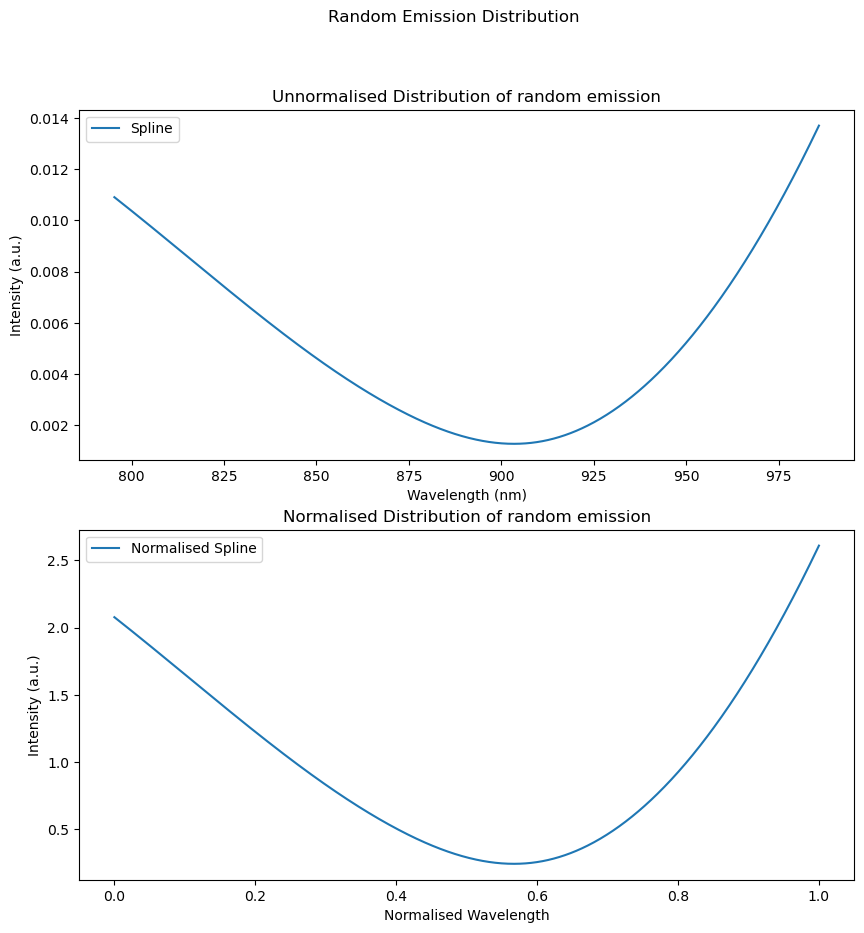

In [4]:
eg.plot_emission()

In [7]:
#time it takes to run generate date
%time x = fluo.generate_data(10_000_000)
# fluo.generate_data(photon_count)

CPU times: user 3.13 s, sys: 1.94 s, total: 5.07 s
Wall time: 3.16 s


/home/markus/code/fluoro-data-gen/scripts/../src/Tissue_Fluorophore.py:458: UserWarning: The channel range bounds are greater than the spectral sensitivty range, the bounds of the spectral sensitivity will be extended
  warnings.warn(


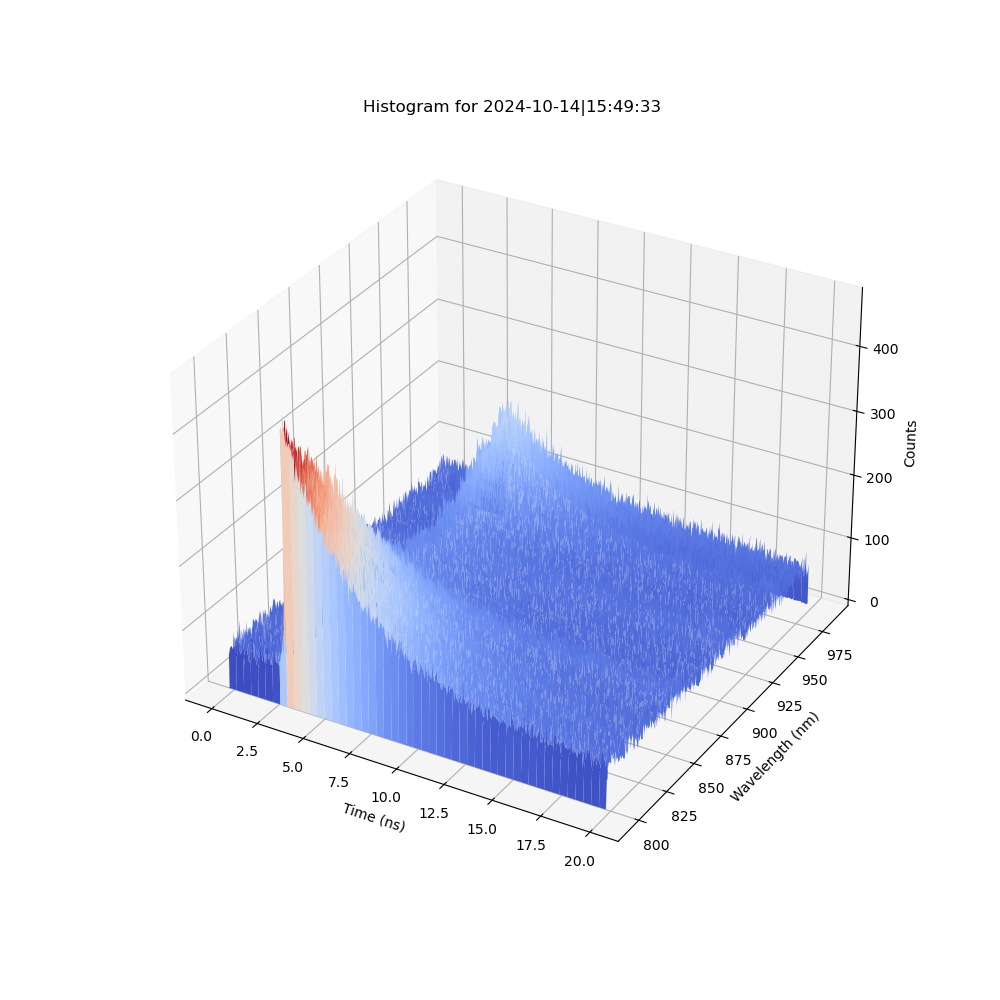

In [8]:
%matplotlib widget
fluo.plot_data(time_range=(0, 20))